In [1]:
%%pyspark
df = spark.read.load('abfss://files@datalake3mq8inp.dfs.core.windows.net/sales/orders/2019.csv', format='csv'
## If header exists uncomment line below
##, header=True
)
display(df.limit(10))

StatementMeta(spark3mq8inp, 0, 2, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 535c1e62-ad7e-46a2-9d5a-7abc3b28cc4b)

In [2]:
 %%pyspark
 df = spark.read.load('abfss://files@datalake3mq8inp.dfs.core.windows.net/sales/orders/*.csv', format='csv'
 )
 display(df.limit(100))

StatementMeta(spark3mq8inp, 0, 3, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 26527d57-6d56-427d-97ba-9ec8b6ec6a2c)

In [3]:
%%pyspark
 from pyspark.sql.types import *
 from pyspark.sql.functions import *

 orderSchema = StructType([
     StructField("SalesOrderNumber", StringType()),
     StructField("SalesOrderLineNumber", IntegerType()),
     StructField("OrderDate", DateType()),
     StructField("CustomerName", StringType()),
     StructField("Email", StringType()),
     StructField("Item", StringType()),
     StructField("Quantity", IntegerType()),
     StructField("UnitPrice", FloatType()),
     StructField("Tax", FloatType())
     ])

 df = spark.read.load('abfss://files@datalake3mq8inp.dfs.core.windows.net/sales/orders/*.csv', format='csv', schema=orderSchema)
 display(df.limit(100))

StatementMeta(spark3mq8inp, 0, 4, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, ce2bbe20-0afb-46f8-bfd9-7861cee91d29)

In [4]:
df.printSchema()

StatementMeta(spark3mq8inp, 0, 5, Finished, Available, Finished)

root
 |-- SalesOrderNumber: string (nullable = true)
 |-- SalesOrderLineNumber: integer (nullable = true)
 |-- OrderDate: date (nullable = true)
 |-- CustomerName: string (nullable = true)
 |-- Email: string (nullable = true)
 |-- Item: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- UnitPrice: float (nullable = true)
 |-- Tax: float (nullable = true)



In [5]:
 customers = df['CustomerName', 'Email']
 print(customers.count())
 print(customers.distinct().count())
 display(customers.distinct())

StatementMeta(spark3mq8inp, 0, 6, Finished, Available, Finished)

32718
12427


SynapseWidget(Synapse.DataFrame, 6196337f-7ec9-43f5-b045-bb3cf0bc2724)

In [6]:
 customers = df.select("CustomerName", "Email").where(df['Item']=='Road-250 Red, 52')
 print(customers.count())
 print(customers.distinct().count())
 display(customers.distinct())

StatementMeta(spark3mq8inp, 0, 7, Finished, Available, Finished)

133
133


SynapseWidget(Synapse.DataFrame, d03c7358-420e-4509-8b85-061e2740fd6e)

In [7]:
 productSales = df.select("Item", "Quantity").groupBy("Item").sum()
 display(productSales)

StatementMeta(spark3mq8inp, 0, 8, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 63113013-38c1-44fc-b3f9-ba075270e06f)

In [8]:
 yearlySales = df.select(year("OrderDate").alias("Year")).groupBy("Year").count().orderBy("Year")
 display(yearlySales)

StatementMeta(spark3mq8inp, 0, 9, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, cbcaf0b3-7493-4e70-8c0f-b3c7d741c25e)

In [9]:
 df.createOrReplaceTempView("salesorders")

 spark_df = spark.sql("SELECT * FROM salesorders")
 display(spark_df)

StatementMeta(spark3mq8inp, 0, 10, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 332c2b19-7997-4765-a4cb-39c43cb44476)

In [12]:
sqlQuery = "SELECT CAST(YEAR(OrderDate) AS CHAR(4)) AS OrderYear, \
                 SUM((UnitPrice * Quantity) + Tax) AS GrossRevenue \
             FROM salesorders \
             GROUP BY CAST(YEAR(OrderDate) AS CHAR(4)) \
             ORDER BY OrderYear"
df_spark = spark.sql(sqlQuery)
df_spark.show()

StatementMeta(spark3mq8inp, 0, 13, Finished, Available, Finished)

+---------+--------------------+
|OrderYear|        GrossRevenue|
+---------+--------------------+
|     2019|   4172169.969970703|
|     2020|   6882259.268127441|
|     2021|1.1547835291696548E7|
+---------+--------------------+



StatementMeta(spark3mq8inp, 0, 14, Finished, Available, Finished)

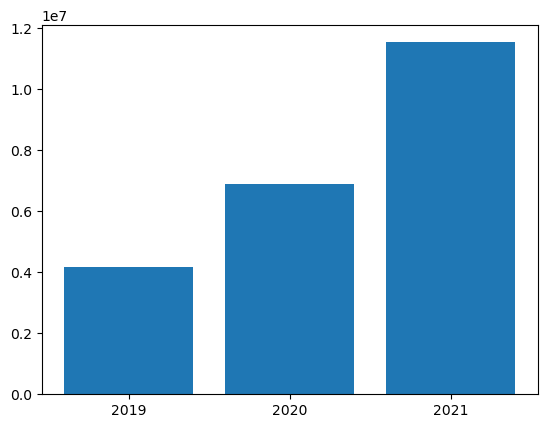

In [13]:
 from matplotlib import pyplot as plt

 # matplotlib requires a Pandas dataframe, not a Spark one
 df_sales = df_spark.toPandas()

 # Create a bar plot of revenue by year
 plt.bar(x=df_sales['OrderYear'], height=df_sales['GrossRevenue'])

 # Display the plot
 plt.show()

StatementMeta(spark3mq8inp, 0, 15, Finished, Available, Finished)

<Figure size 640x480 with 0 Axes>

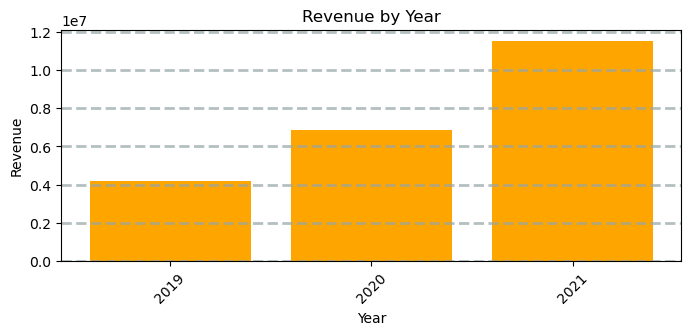

In [14]:
 # Clear the plot area
 plt.clf()

 # Create a Figure
 fig = plt.figure(figsize=(8,3))

 # Create a bar plot of revenue by year
 plt.bar(x=df_sales['OrderYear'], height=df_sales['GrossRevenue'], color='orange')

 # Customize the chart
 plt.title('Revenue by Year')
 plt.xlabel('Year')
 plt.ylabel('Revenue')
 plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
 plt.xticks(rotation=45)

 # Show the figure
 plt.show()